In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/food-order-cost-and-profit-analysis/food_orders_new_delhi (1).csv


In [2]:
df=pd.read_csv("/kaggle/input/food-order-cost-and-profit-analysis/food_orders_new_delhi (1).csv")

In [3]:
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [4]:
df.isnull().sum()

Order ID                    0
Customer ID                 0
Restaurant ID               0
Order Date and Time         0
Delivery Date and Time      0
Order Value                 0
Delivery Fee                0
Payment Method              0
Discounts and Offers      185
Commission Fee              0
Payment Processing Fee      0
Refunds/Chargebacks         0
dtype: int64

In [5]:
df.drop(columns=['Discounts and Offers'],inplace=True)

In [6]:
df.drop(columns=['Order ID'],inplace= True)

In [7]:
df.drop(columns=['Customer ID'],inplace = True)

In [8]:
df.head()

,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,150,47,0
1,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,198,23,0
2,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,195,45,0
3,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,146,27,0
4,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,130,50,0


In [9]:
df['Order Date and Time']=pd.to_datetime(df['Order Date and Time'])
df['Delivery Date and Time']=pd.to_datetime(df['Delivery Date and Time'])

In [10]:
df1=df.rename(columns={"Order Date and Time":"OrderTime","Delivery Date and Time":"DeliveryTime","Order Value":"Amount","Delivery Fee":"DeliveryFee","Payment Method":"PaymentMethod","Commission Fee":"CommissionFee","Payment Processing Fee":"ProcessingFee","Refunds/Chargebacks":"Refunds"})

In [11]:
df1

,Restaurant ID,OrderTime,DeliveryTime,Amount,DeliveryFee,PaymentMethod,CommissionFee,ProcessingFee,Refunds
0,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,150,47,0
1,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,198,23,0
2,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,195,45,0
3,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,146,27,0
4,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,130,50,0
...,...,...,...,...,...,...,...,...,...
995,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,825,0,Digital Wallet,165,47,50
996,R2742,2024-01-28 08:50:43,2024-01-28 10:10:43,1627,50,Cash on Delivery,110,42,0
997,R2837,2024-01-21 09:43:19,2024-01-21 10:44:19,553,20,Cash on Delivery,64,31,0
998,R2144,2024-01-30 22:23:38,2024-01-31 00:07:38,1414,0,Cash on Delivery,199,34,0


## Top 15 Restaurants with highest frequency of orders

In [12]:
import seaborn as sns


In [13]:
df1['Count']=1

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Restaurant ID', ylabel='Count'>

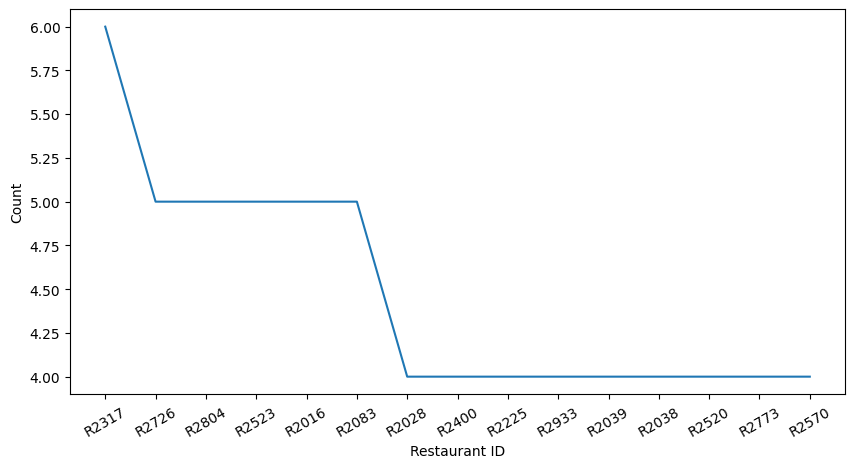

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.xticks(rotation=30)

df2=df1.groupby("Restaurant ID").agg({"Count":"sum"}).reset_index().sort_values(by='Count',ascending=False)
sns.lineplot(x='Restaurant ID',y='Count',data=df2.head(15))

## Average Order Fulfillment Time  of the Top Selling Restaurants

In [15]:
df3=df1.copy()
df3['FulfillmentTime']=df3['DeliveryTime']-df3['OrderTime']
df3['FulfillmentTime']=df3['FulfillmentTime'].dt.seconds/60

In [16]:
df3=df3.groupby('Restaurant ID').agg({"FulfillmentTime":"mean"}).reset_index().sort_values(by='FulfillmentTime')
df3

,Restaurant ID,FulfillmentTime
348,R2575,30.0
461,R2761,30.0
473,R2785,30.0
215,R2351,31.0
527,R2876,31.0
...,...,...
538,R2889,117.0
591,R2958,118.0
227,R2371,118.0
400,R2674,118.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Restaurant ID', ylabel='FulfillmentTime'>

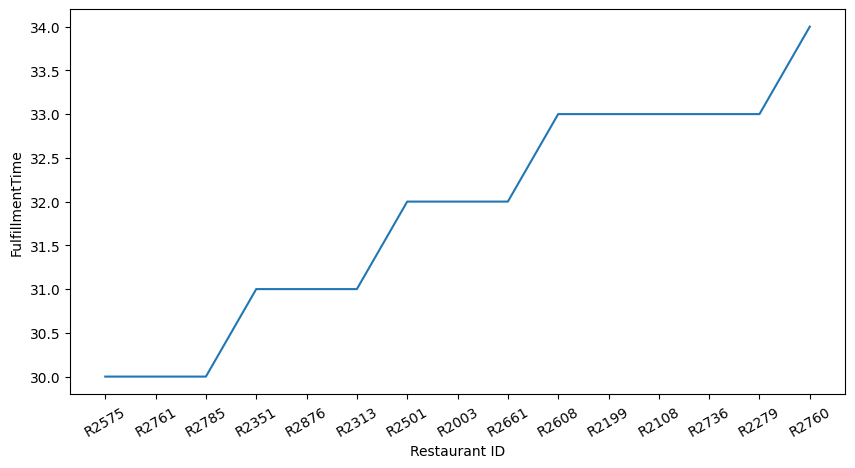

In [17]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=30)
sns.lineplot(x='Restaurant ID',y='FulfillmentTime',data=df3.head(15))

In [18]:
df3

,Restaurant ID,FulfillmentTime
348,R2575,30.0
461,R2761,30.0
473,R2785,30.0
215,R2351,31.0
527,R2876,31.0
...,...,...
538,R2889,117.0
591,R2958,118.0
227,R2371,118.0
400,R2674,118.0


In [19]:
df3['TotalOrders']=df2['Count']

In [20]:
df3=df3.sort_values(by='TotalOrders',ascending=False)

Text(0, 0.5, 'Total Orders')

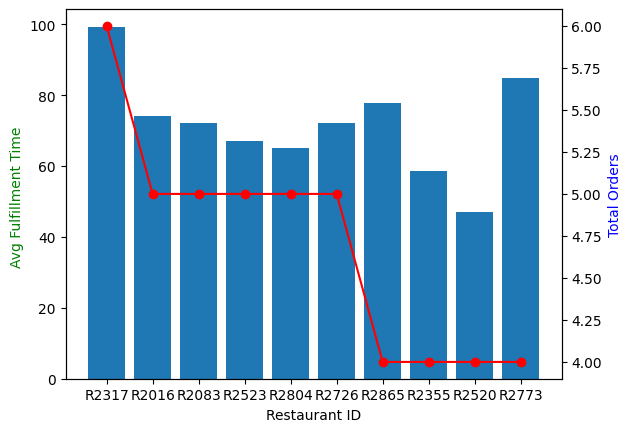

In [21]:
import matplotlib.pyplot as plt
x = df3['Restaurant ID'].head(10)
y = df3.FulfillmentTime.head(10)
y1 = df3.TotalOrders.head(10)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y)
ax2.plot(x, y1, 'o-', color="red" )

ax1.set_xlabel('Restaurant ID')
ax1.set_ylabel('Avg Fulfillment Time ', color='g')
ax2.set_ylabel('Total Orders', color='b')

## Expensive Restaurant Vs. Total Orders

In [22]:
df3=df1.groupby('Restaurant ID').agg({"Count":"sum","Amount":"mean"}).reset_index().sort_values(by='Count',ascending=False)
df3

,Restaurant ID,Count,Amount
195,R2317,6,856.833333
434,R2726,5,1358.800000
483,R2804,5,973.600000
317,R2523,5,940.600000
10,R2016,5,834.200000
...,...,...,...
127,R2208,1,1171.000000
355,R2585,1,1673.000000
354,R2584,1,1981.000000
128,R2209,1,996.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Figure size 640x480 with 0 Axes>

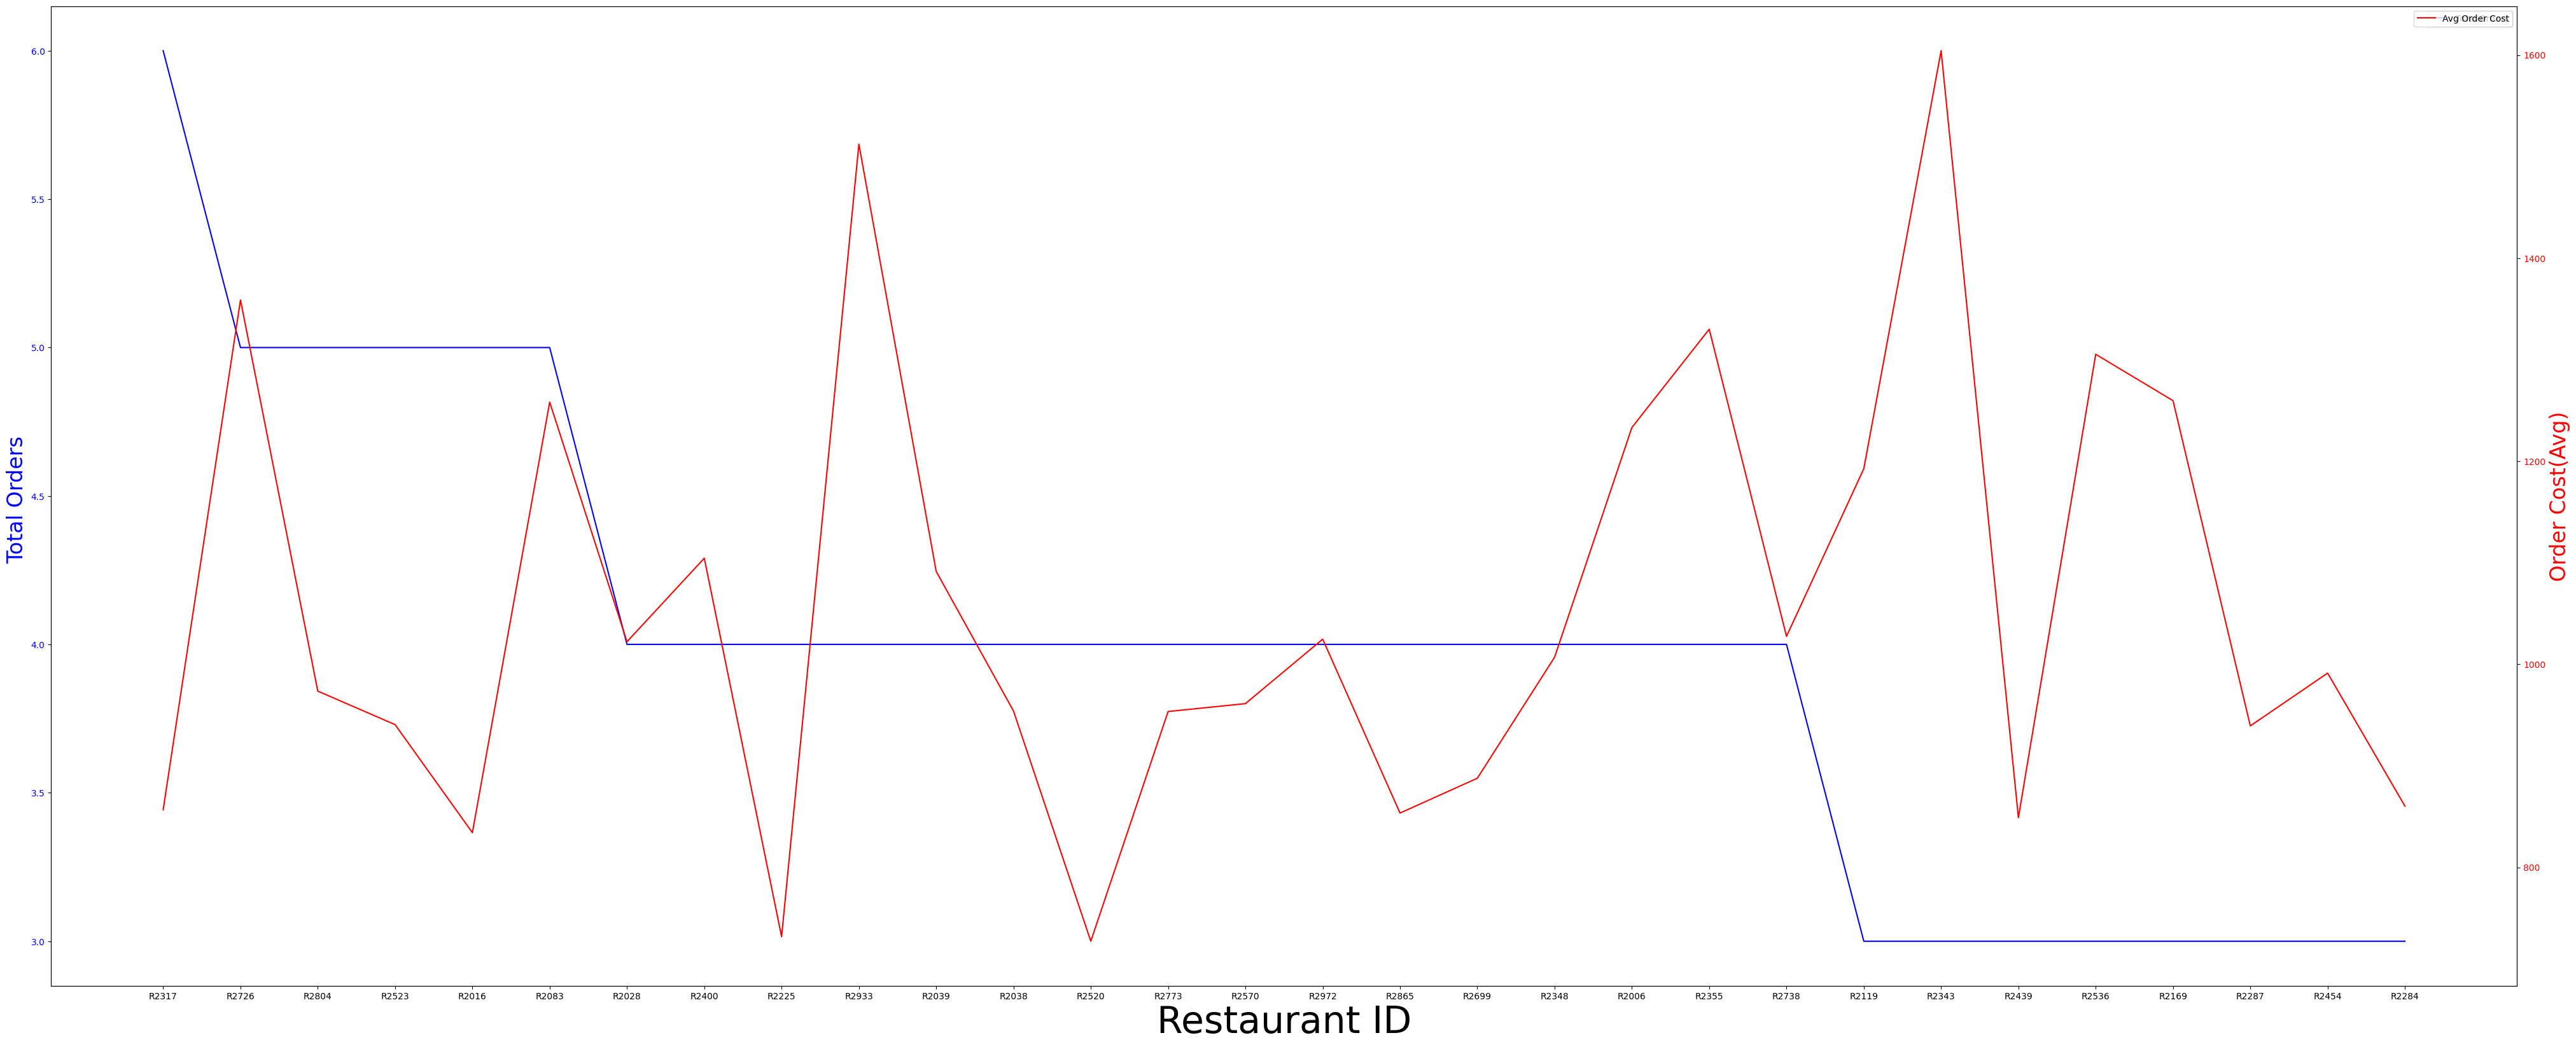

In [23]:
### # Create the first plot with the primary y-axis
plt.figure()
fig, ax1 = plt.subplots(figsize=(50, 20))

sns.lineplot(x='Restaurant ID', y='Count', data=df3.head(30), ax=ax1, color='b', label='Total Orders')
ax1.set_ylabel('Total Orders ', color='b',fontsize=24)
ax1.set_xlabel("Restaurant ID",fontsize=42)
ax1.tick_params(axis='y', labelcolor='b')

# Create the second y-axis
ax2 = ax1.twinx()

sns.lineplot(x='Restaurant ID', y='Amount', data=df3.head(30), ax=ax2, color='r', label='Avg Order Cost')
ax2.set_ylabel('Order Cost(Avg)', color='r',fontsize=24)
ax2.tick_params(axis='y', labelcolor='r')

# Display the plot
plt.show()

In [24]:
df4=df1.groupby(['Restaurant ID',"PaymentMethod"]).agg({"Count":"sum"}).reset_index().sort_values(by='Count',ascending=False)


# User Payment Preference

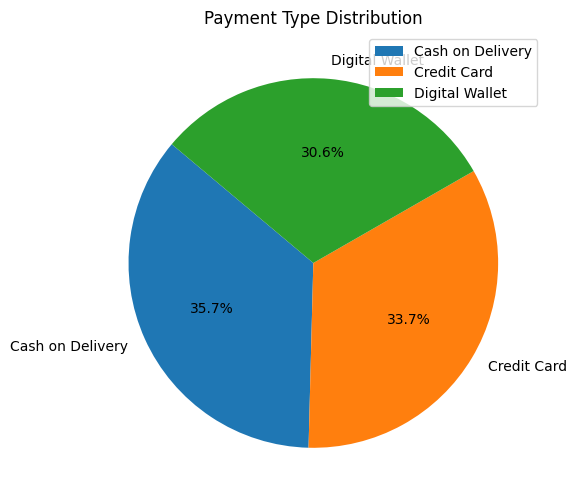

In [25]:


df5=df1.groupby("PaymentMethod").agg({"Count":"sum"}).reset_index()
# Plot pie chart from the 'Count' column
df5.set_index('PaymentMethod').plot.pie(y='Count', autopct='%1.1f%%', figsize=(6, 6), startangle=140)

plt.ylabel('')  # Remove y-label for better aesthetics
plt.title('Payment Type Distribution')
plt.show()

## Impact of Delivery Fee on Restaurant's Order Placement

In [26]:
df6=df1.groupby("Restaurant ID").agg({"DeliveryFee":"mean"}).reset_index()
df7=df6.merge(df2,on='Restaurant ID')
df7=df7.sort_values(by='Count',ascending=False)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Figure size 640x480 with 0 Axes>

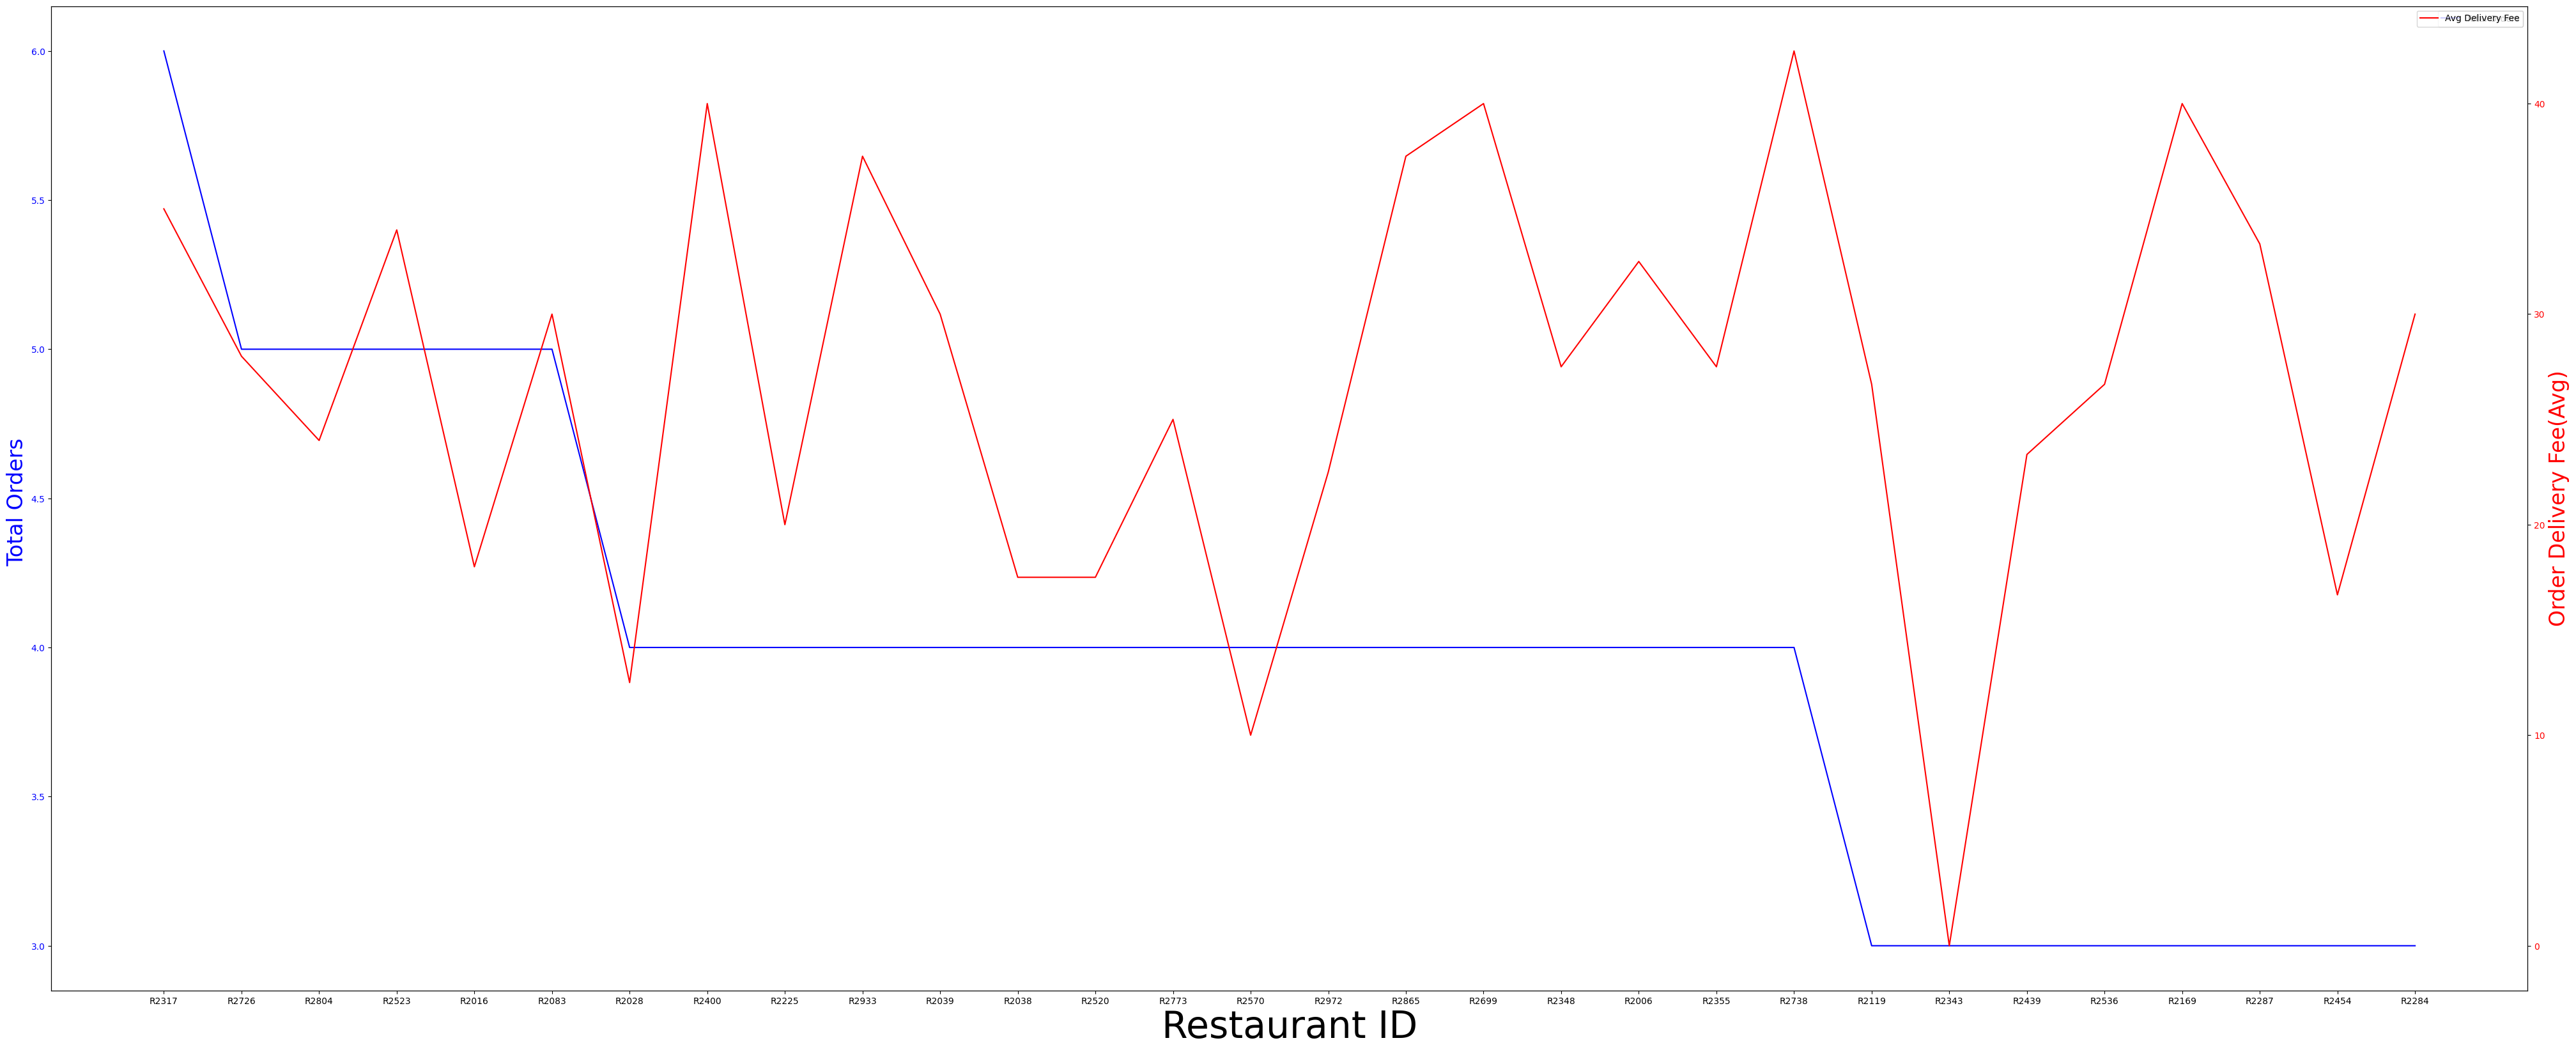

In [27]:
### # Create the first plot with the primary y-axis
plt.figure()
fig, ax1 = plt.subplots(figsize=(50, 20))

sns.lineplot(x='Restaurant ID', y='Count', data=df7.head(30), ax=ax1, color='b', label='Total Orders')
ax1.set_ylabel('Total Orders ', color='b',fontsize=24)
ax1.set_xlabel("Restaurant ID",fontsize=42)
ax1.tick_params(axis='y', labelcolor='b')

# Create the second y-axis
ax2 = ax1.twinx()

sns.lineplot(x='Restaurant ID', y='DeliveryFee', data=df7.head(30), ax=ax2, color='r', label='Avg Delivery Fee')
ax2.set_ylabel('Order Delivery Fee(Avg)', color='r',fontsize=24)
ax2.tick_params(axis='y', labelcolor='r')

# Display the plot
plt.show()

In [28]:
df3=df1.groupby('Restaurant ID').agg({"Refunds":"mean"}).reset_index().sort_values(by='Refunds',ascending=False)
df3
df7=df3.merge(df2,on='Restaurant ID')
df7=df7.sort_values(by='Count',ascending=False)
df7

,Restaurant ID,Refunds,Count
187,R2317,41.666667,6
128,R2804,50.000000,5
175,R2016,50.000000,5
243,R2523,10.000000,5
244,R2726,10.000000,5
...,...,...,...
364,R2877,0.000000,1
363,R2878,0.000000,1
362,R2881,0.000000,1
361,R2861,0.000000,1


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Figure size 640x480 with 0 Axes>

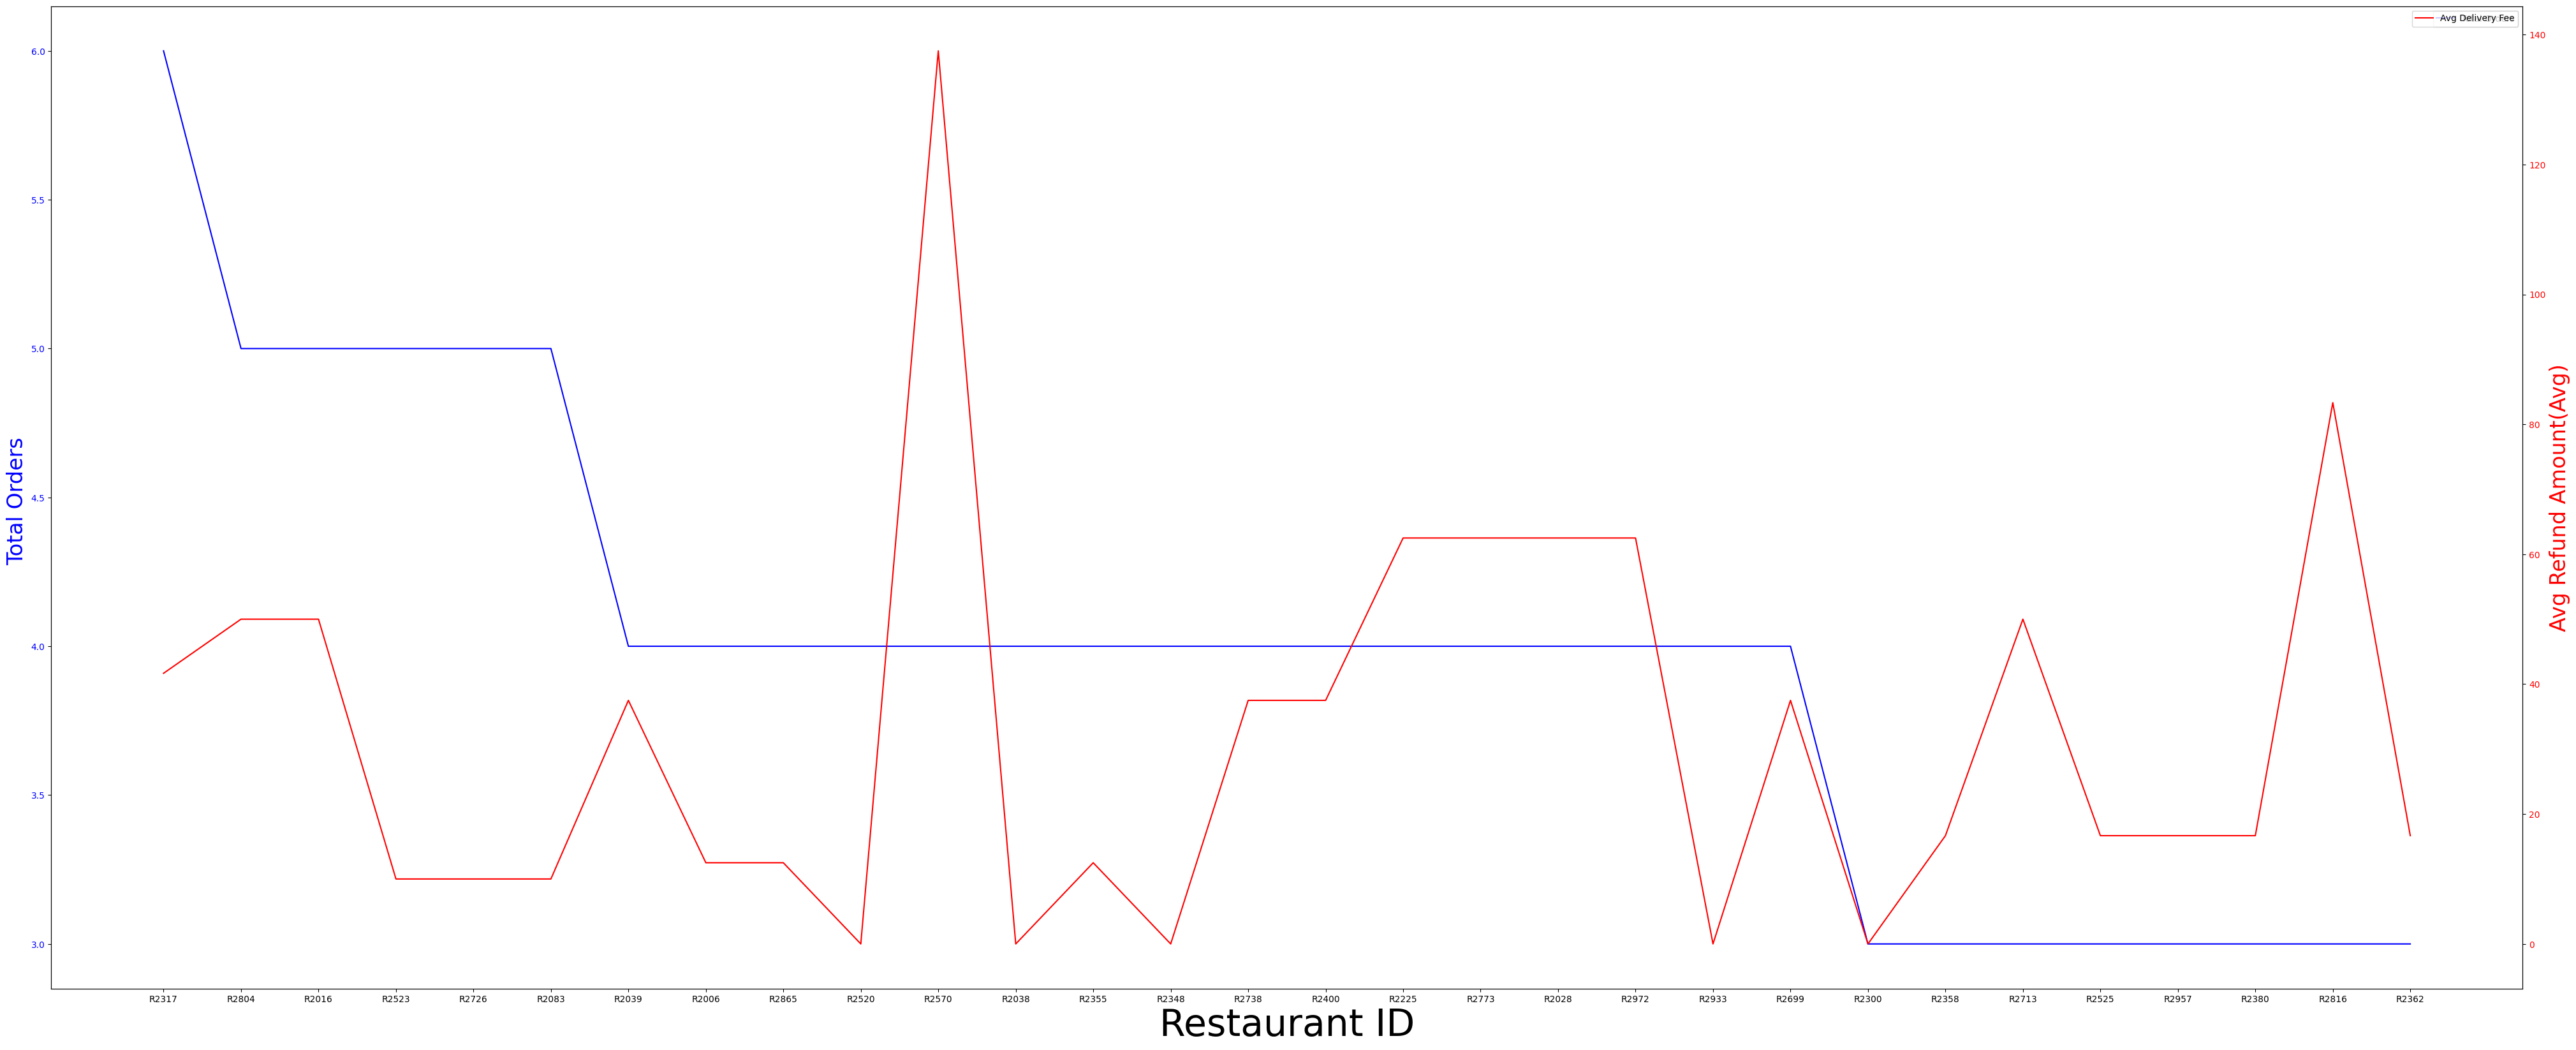

In [29]:
plt.figure()
fig, ax1 = plt.subplots(figsize=(50, 20))

sns.lineplot(x='Restaurant ID', y='Count', data=df7.head(30), ax=ax1, color='b', label='Total Orders')
ax1.set_ylabel('Total Orders ', color='b',fontsize=24)
ax1.set_xlabel("Restaurant ID",fontsize=42)
ax1.tick_params(axis='y', labelcolor='b')

# Create the second y-axis
ax2 = ax1.twinx()

sns.lineplot(x='Restaurant ID', y='Refunds', data=df7.head(30), ax=ax2, color='r', label='Avg Delivery Fee')
ax2.set_ylabel('Avg Refund Amount(Avg)', color='r',fontsize=24)
ax2.tick_params(axis='y', labelcolor='r')

# Display the plot
plt.show()

# INFERENCES 

* Average Fulfullment Time impacts the total orders placed by the customers. Greater the fulfillment time, lesser the orders

* Users do not have much preference for Payment Type, more or less all three payment types are preferred with avg 33% distribution.


* Order Cost inversely impacts the restaurant's popularity. Greater the price of the menu, lesser are the orders placed.

* Delivery Time also inversely impacts the restaurant's popularity. Users prefer placing more orders from restaurant where delivery time is less.

* Restaurants that have received more refund requests have got less orders placed overall